# 1. Анализ данных в Python (pandas и numpy)

A. Загрузка и первичный обзор

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/winemag-data_first150k.csv', index_col=0)

print(df.head())
print(df.info())
print(df.shape)

# Приведение типов
df['country'] = df['country'].astype('category')
df['variety'] = df['variety'].astype('category')
df['winery'] = df['winery'].astype('category')

  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard    96.0  235.0      California   
1  Carodorum Selección Especial Reserva    96.0  110.0  Northern Spain   
2         Special Selected Late Harvest    96.0   90.0      California   
3                               Reserve    96.0   65.0          Oregon   
4                            La Brûlade    95.0   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN     

B. Обработка данных

country            2
description        0
designation     8217
points             1
price           2508
province           3
region_1        4456
region_2       17590
variety            1
winery             1
dtype: int64
Дубликатов по описанию: 1320


/tmp/ipython-input-4144613975.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['price'] = df.groupby('variety')['price'].transform(lambda x: x.fillna(x.median()))


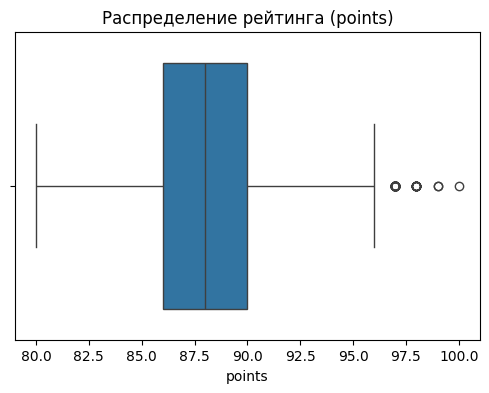

             points         price
count  27031.000000  27031.000000
mean      88.399430     32.303448
std        3.024517     22.235180
min       80.000000      4.000000
25%       86.000000     17.000000
50%       88.000000     25.000000
75%       90.000000     40.000000
max      100.000000    150.000000
country
US           10851
Italy         4772
France        4249
Spain         1534
Portugal      1039
Argentina      867
Chile          759
Austria        694
Germany        573
Australia      572
Name: count, dtype: int64
variety
Pinot Noir                  2953
Chardonnay                  2206
Cabernet Sauvignon          1882
Red Blend                   1831
Bordeaux-style Red Blend    1332
Riesling                    1189
Sauvignon Blanc              949
Syrah                        947
Rosé                         738
Merlot                       674
Name: count, dtype: int64
          points     price
points  1.000000  0.526139
price   0.526139  1.000000


In [3]:
#Пропущенные значения
print(df.isnull().sum())

df['price'] = df.groupby('variety')['price'].transform(lambda x: x.fillna(x.median()))
df = df.dropna(subset=['country'])
df.drop(columns=['designation', 'region_1', 'region_2'], inplace=True, errors='ignore')

#Дубликаты
duplicates = df.duplicated(subset=['description']).sum()
print(f"Дубликатов по описанию: {duplicates}")
df.drop_duplicates(subset=['description'], inplace=True)

#Выбросы (при необходимости)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['price'] <= df['price'].quantile(0.99)]

# Boxplot для points
plt.figure(figsize=(6,4))
sns.boxplot(x=df['points'])
plt.title('Распределение рейтинга (points)')
plt.show()

#Статистика данных
print(df[['points', 'price']].describe())

print(df['country'].value_counts().head(10))
print(df['variety'].value_counts().head(10))

print(df[['points', 'price']].corr())

Визуализация данных

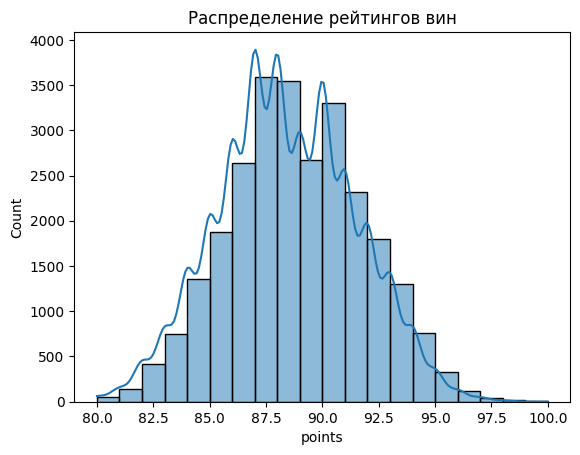

/tmp/ipython-input-2436261631.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_country = df[df['country'].isin(top_countries)].groupby('country')['price'].mean().sort_values(ascending=False)


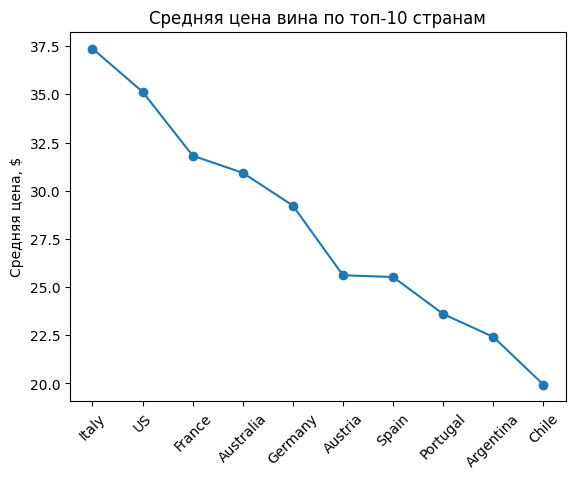

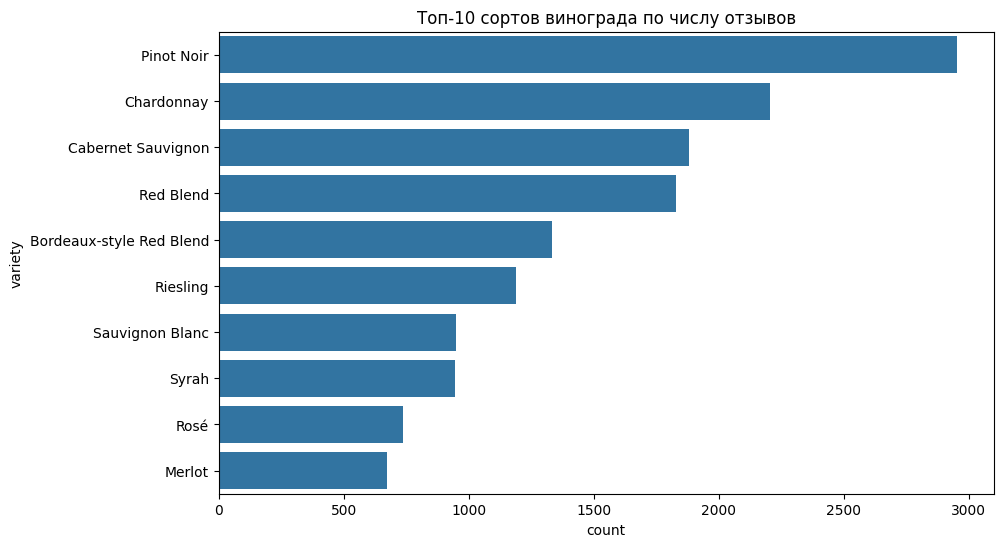

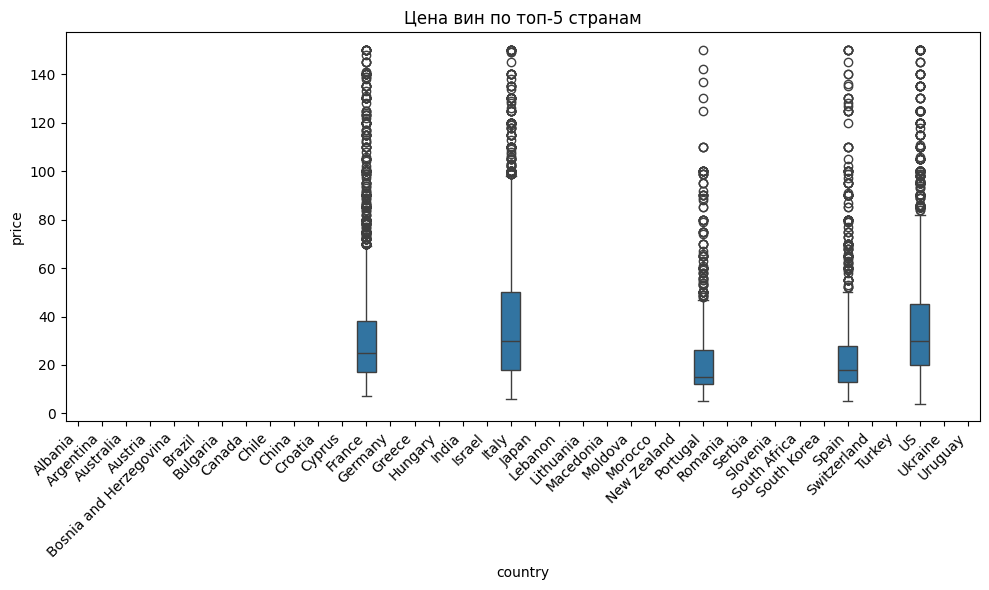

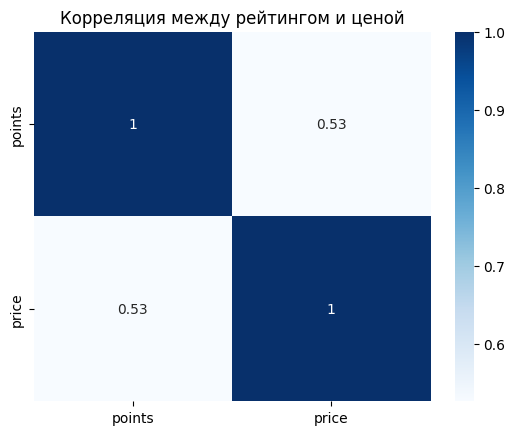

In [4]:
# 1. Гистограмма: распределение рейтингов
sns.histplot(df['points'], bins=20, kde=True)
plt.title('Распределение рейтингов вин')
plt.show()

# 2. Линейный график: средняя цена по топ-10 странам (условный "тренд")
top_countries = df['country'].value_counts().head(10).index
avg_price_by_country = df[df['country'].isin(top_countries)].groupby('country')['price'].mean().sort_values(ascending=False)
plt.plot(avg_price_by_country.index, avg_price_by_country.values, marker='o')
plt.xticks(rotation=45)
plt.title('Средняя цена вина по топ-10 странам')
plt.ylabel('Средняя цена, $')
plt.show()

# 3. Столбчатая диаграмма: топ-10 сортов по количеству отзывов
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='variety', order=df['variety'].value_counts().head(10).index)
plt.title('Топ-10 сортов винограда по числу отзывов')
plt.show()

# 4. Boxplot: цена по странам (топ-5)
top5 = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top5)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top5, x='country', y='price')
plt.xticks(rotation=45, ha='right')
plt.title('Цена вин по топ-5 странам')
plt.tight_layout()
plt.show()

# 5. Heatmap корреляции
sns.heatmap(df[['points', 'price']].corr(), annot=True, cmap='Blues')
plt.title('Корреляция между рейтингом и ценой')
plt.show()

Группировки и агрегации

In [10]:
# 1. Средний рейтинг и цена по стране
agg1 = df.groupby('country').agg(
    avg_points=('points', 'mean'),
    avg_price=('price', 'mean'),
    count=('country', 'size')
).sort_values('avg_points', ascending=False).head(10)

print("1. Топ-10 стран по среднему рейтингу:")
agg1

1. Топ-10 стран по среднему рейтингу:


/tmp/ipython-input-3808554833.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg1 = df.groupby('country').agg(


,avg_points,avg_price,count
country,,,
Switzerland,90.000000,24.500000,2
Austria,89.541787,25.613833,694
India,89.500000,11.833333,6
Lebanon,89.400000,18.600000,5
Morocco,89.222222,19.444444,9
France,88.986350,31.820781,4249
Canada,88.838710,30.145161,62
Germany,88.834206,29.231239,573
Italy,88.724644,37.377096,4772


In [8]:
# 2. Топ-5 сортов с самым высоким средним рейтингом
agg2 = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(5)

print("2. Топ-5 сортов по среднему рейтингу:")
agg2


2. Топ-5 сортов по среднему рейтингу:


/tmp/ipython-input-34605511.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg2 = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(5)


,points
variety,
Cabernet-Shiraz,96.00
Tokay,93.75
Picolit,93.50
Sirica,93.00
Trousseau Gris,93.00


In [9]:
# 3. Сводная таблица: средний рейтинг по стране и сорту (для топ-3 стран и сортов)
top_countries = df['country'].value_counts().head(3).index
top_varieties = df['variety'].value_counts().head(3).index
pivot = df[
    (df['country'].isin(top_countries)) &
    (df['variety'].isin(top_varieties))
].pivot_table(
    values='points',
    index='country',
    columns='variety',
    aggfunc='mean'
)

print("3. Сводная таблица: средний рейтинг (топ-3 страны × топ-3 сорта):")
pivot

3. Сводная таблица: средний рейтинг (топ-3 страны × топ-3 сорта):


/tmp/ipython-input-3693942937.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ].pivot_table(


variety,Cabernet Sauvignon,Chardonnay,Pinot Noir
country,,,
France,85.142857,88.790754,89.895105
Italy,88.363636,88.500000,85.500000
US,88.907923,88.348617,89.619901
